<DIV ALIGN=CENTER>

# Naive Bayes
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use the Naive
Bayes algorithm. First, we repeat the analysis of the Iris and
hand-written digit data used in both the [K-NN][l1] and [SVM][l2] IPython Notebooks.
However, we now switch to the Naive Bayes algorithm. Throughout this
Notebook, you should think about how these results from this algorithm
are different than the results from the KNN and SVM algorithms. Also,
explore how changes in the default parameters might affect the
performance of this algorithm.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Naive Bayes][nbsk] algorithm.

-----
[l1]: intro2knn.ipynb
[l2]: intro2svm.ipynb
[nbsk]: http://scikit-learn.org/stable/modules/naive_bayes.html

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use these basic classification algorithms, starting in this Notebooks
with k-nearest neighbors, or knn. The four primary dimensions of the
data include Sepal Length, Sepal Width, Petal Length, and Petal Width,
which can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

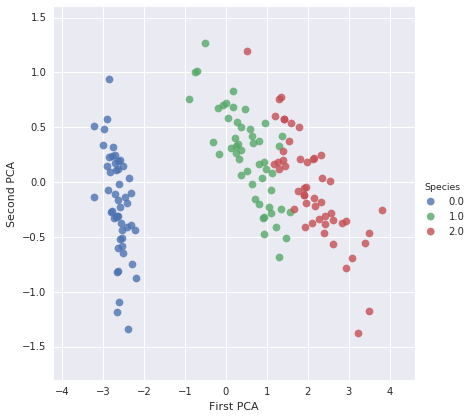

In [2]:
# We import helper code for getting and plotting the Iris data
from helper_code import iris as hi

# Now we grab the raw data, and also create a sampled grid of data.

# This code restricts the features to the top two PCA components
# This simplifies the viewing of the predited labels.

data = hi.get_data()
mdata = hi.get_mdata(data)

# Get features (x) and labels (y)
x = data[:, 0:2]
y = data[:, 2]

# Show the data
cols = ['PCA1', 'PCA2', 'Species']

# We make a plot of the features.
hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Naive Bayes][nb] (NB)

The first algorithm we will explore is one of the simplest, the [Naive
Bayes][nb] algorithm. Fundamentally, this algorithm is remarkable simple
and is based on the assumption of independence that a given attribute (or
feature) belongs to a specific class. scikit learn provides several
Naive Bayes implementations, using a specific one generally depends on
the nature of the data being analyzed:

- [Gaussian Naive Bayes][gnb] 
- [Multinomial Naive Bayes][mnb] 
- [Bernoulli Naive Bayes][bnb] 

In the following code cells, we demonstrate how to perform Naive Bayes
classification by using scikit-learn, in this case we use the Gaussian
Naive Bayes implementation. The standard classification process in
scikit-learn is to first fit a model to the training data and to
subsequently apply this model to predict values for the testing data.
After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----
[gnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
[mnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
[bnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
[nb]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

NB prediction accuracy =  94.7%


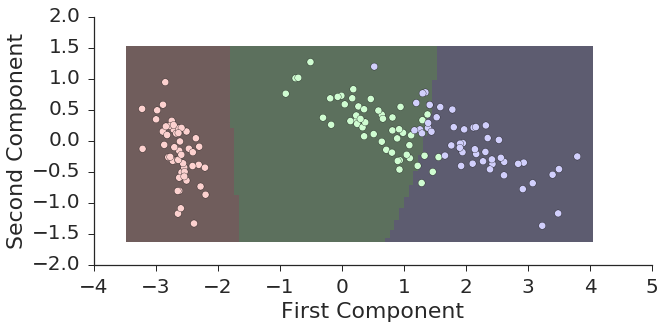

In [3]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# First, lets try Gaussain NB
from sklearn.naive_bayes import GaussianNB

# First we construct our Classification Model
nb = GaussianNB()

nb.fit(x_train, y_train);

z = nb.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * nb.score(x_test, y_test)))

In [4]:
from sklearn.metrics import classification_report

y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        10
 Versicolor       0.89      1.00      0.94        16
  Virginica       1.00      0.83      0.91        12

avg / total       0.95      0.95      0.95        38



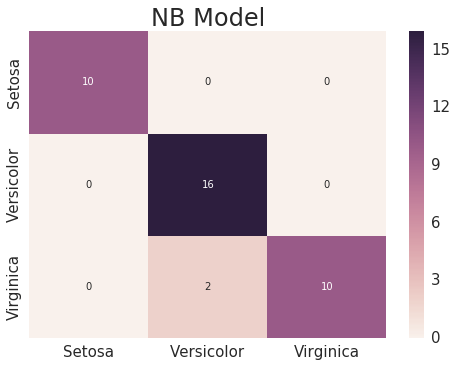

In [5]:
from helper_code import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, "NB Model")

-----

## Student Activity

In the preceding cells, we used a simple Gaussian Naive Bayes model to
predict classifications for the Iris Data. Now that you have run the
Notebook once, go back and make the following changes to see how the
results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the Gaussian Naive Bayes algorithm.
Read the code documentation to learn about the default parameters.
3. Change the type of Naive Bayes algorithm to either a Bernoulli or
Multinomial.

How does the two-dimensional figure compare to the same figure in the KNN or SVM Notebooks?

-----

## Handwritten Digits

Now we switch to a second type of data and explore Naive Bayes
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply a
Multinomial Naive Bayes classification to these data and explore the
resulting predictions.

-----

Total number of samples = 1797


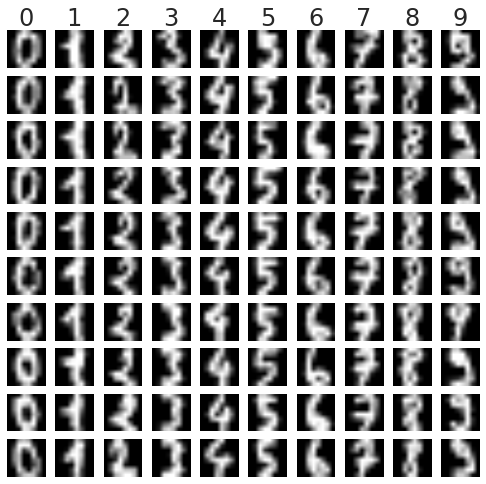

In [6]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply a Naives Bayes classifier
to this problem. Below we employ a Multinomial Naive Bayes model, and
show the classification score, the classification report, and the
confusion matrix.

-----

In [7]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# First, lets try Gaussain NB
from sklearn.naive_bayes import MultinomialNB

# First we construct our Classification Model
nbc = MultinomialNB()

nbc.fit(x_train, y_train);

print('Prediction Accuracy = {0:3.1f}%'.format(100*nbc.score(x_test, y_test)))

Prediction Accuracy = 89.1%


In [8]:
y_pred = nbc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96        34
          1       0.86      0.59      0.70        51
          2       0.85      0.85      0.85        54
          3       0.97      0.95      0.96        41
          4       0.96      0.93      0.95        46
          5       1.00      0.86      0.92        43
          6       0.98      1.00      0.99        42
          7       0.93      0.98      0.95        43
          8       0.77      0.98      0.86        45
          9       0.76      0.88      0.82        51

avg / total       0.90      0.89      0.89       450



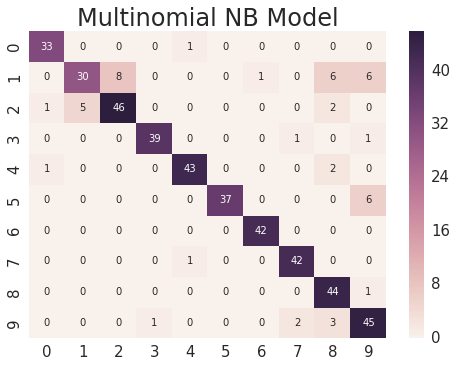

In [9]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, "Multinomial NB Model")

-----

### Model Evaluation

The Naive Bayes model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----



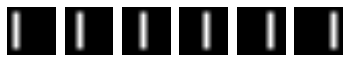

In [10]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [11]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [12]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(nbc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     0
  1    :     0
  1    :     1
  1    :     1
  1    :     9
  1    :     9


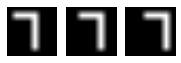

In [13]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [14]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(nbc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     2
  7    :     9
  7    :     9


-----

## Student Activity

In the preceding cells, we used a simple Multinomial Naive Bayes model
to predict classifications for the digit data. Now that you have run the
Notebook, go back and make the following changes to see how the results
change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the Multinomial Naive Bayes
algorithm. Read the code documentation to learn about the default
parameters.
3. Change the type of Naive Bayes algorithm to either a Bernoulli or
Gaussian.

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits?

-----